In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
from PIL import Image
import random
import pickle

In [37]:
data_set_dir = 'D:\Road_Sign_Data_Set\Raw_Data'

In [9]:
categories = ['LEFT','RIGHT','STOP']
#LEFT:0,RIGT:1,STOP:2
img_size = 56

In [40]:
training_set = []
def create_training_set() :
    for category in categories:
        sub_dir_files = os.listdir(data_set_dir+'\\'+category)
        for file in sub_dir_files :
            category_index = categories.index(category)
            image = Image.open(data_set_dir+'\\'+category+'\\'+file).convert('L')
            image = image.resize((img_size,img_size))
            array_image = np.array(image)
            training_set.append([array_image,category_index])
        
create_training_set()

In [41]:
random.shuffle(training_set)

1


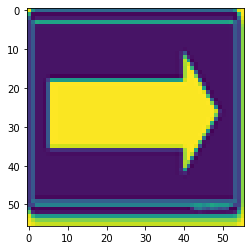

0


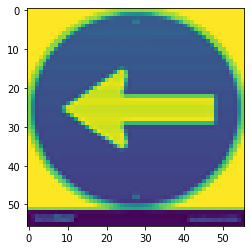

2


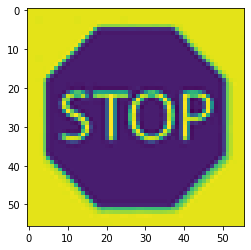

2


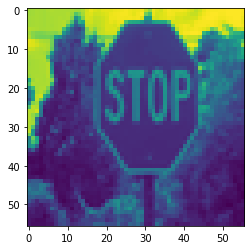

2


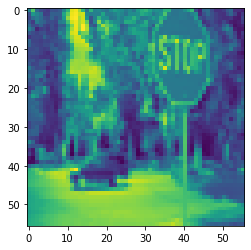

0


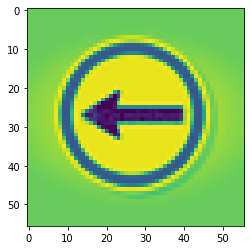

0


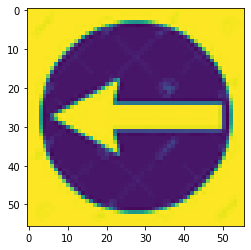

1


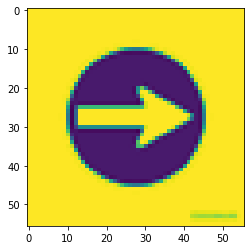

2


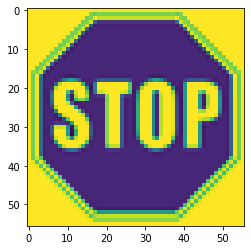

1


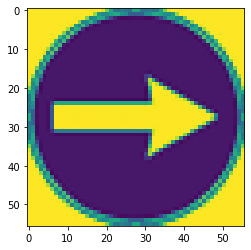

2


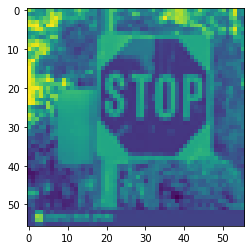

0


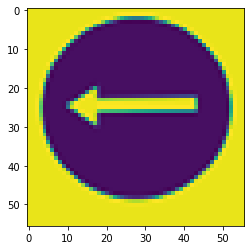

1


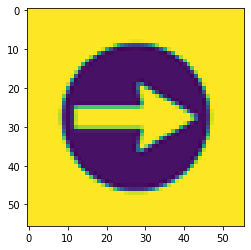

2


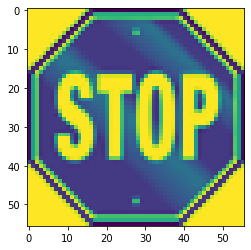

0


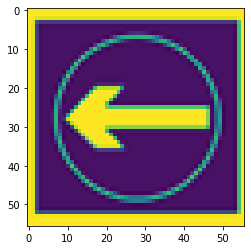

0


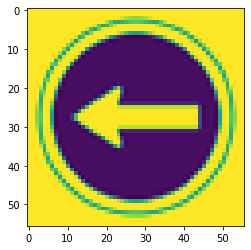

2


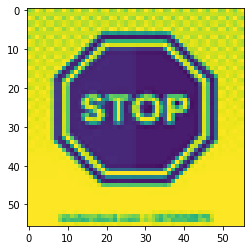

2


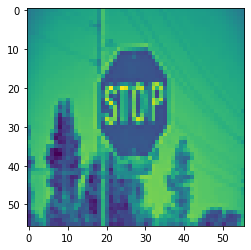

2


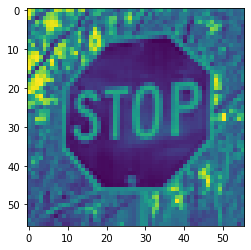

2


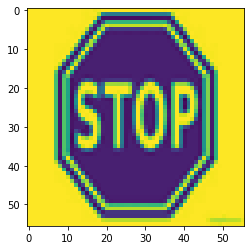

2


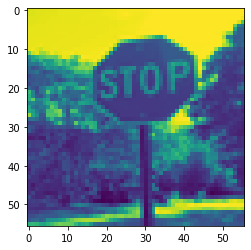

0


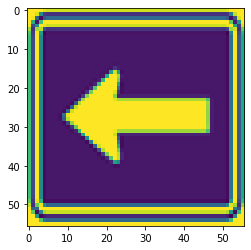

1


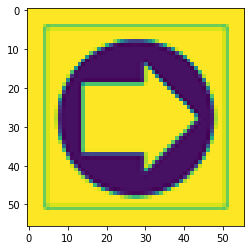

1


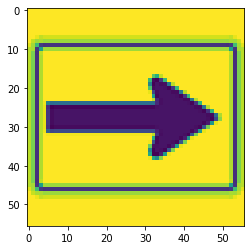

1


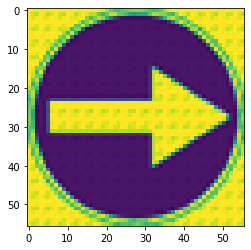

2


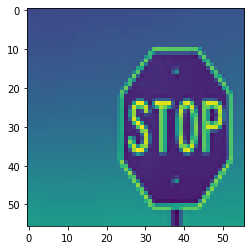

0


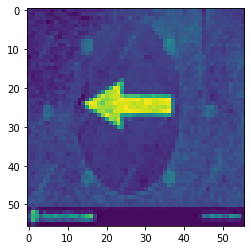

2


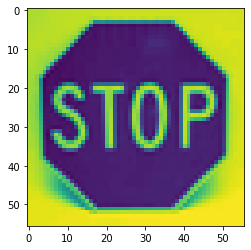

1


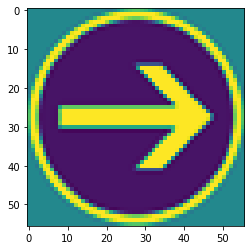

1


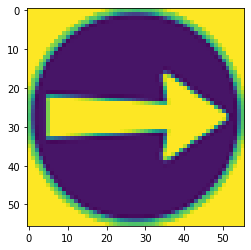

1


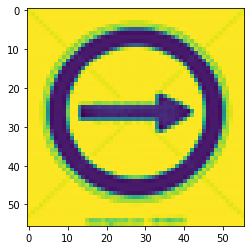

1


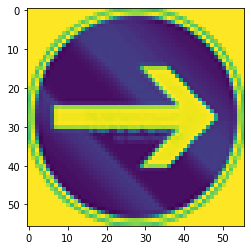

0


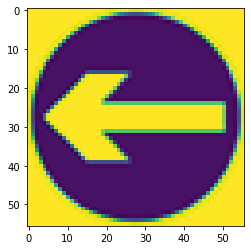

1


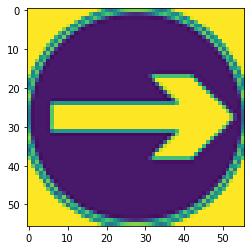

2


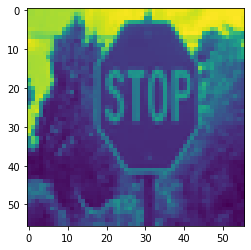

2


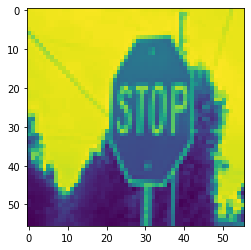

0


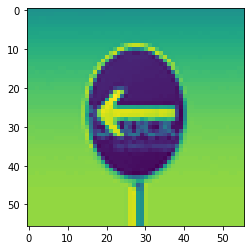

2


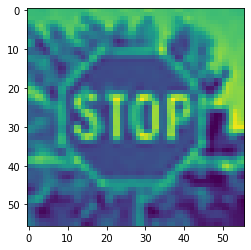

0


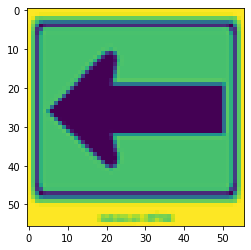

0


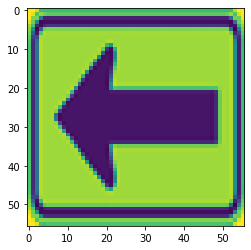

2


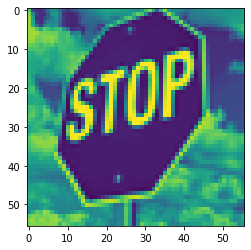

2


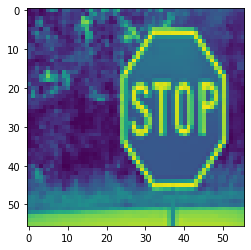

2


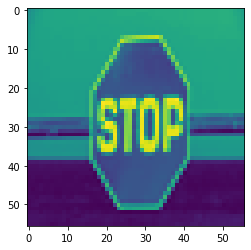

1


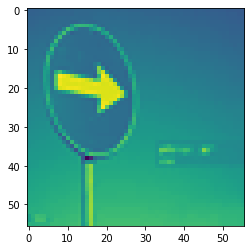

0


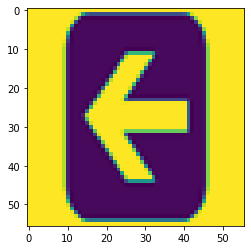

1


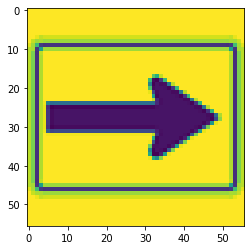

2


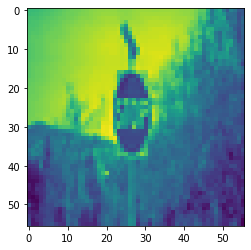

1


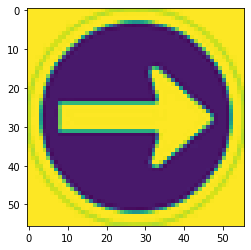

0


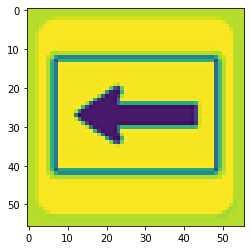

2


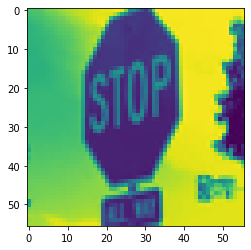

0


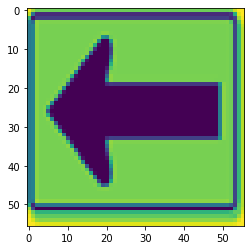

0


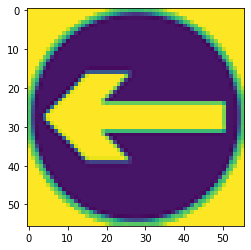

1


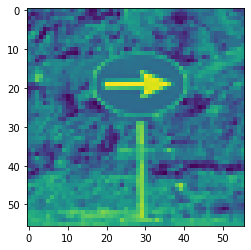

1


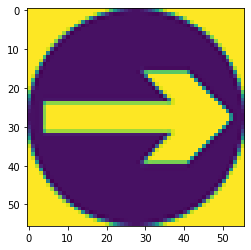

2


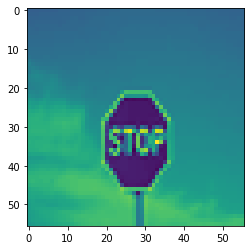

2


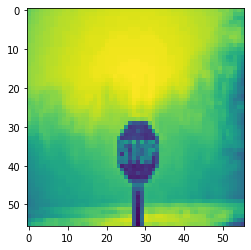

1


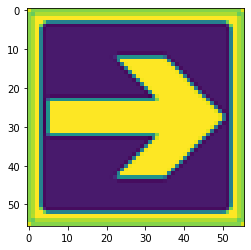

1


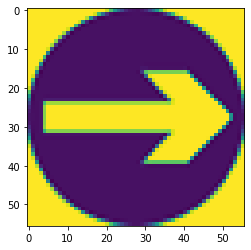

1


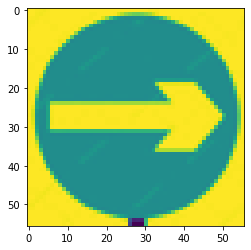

0


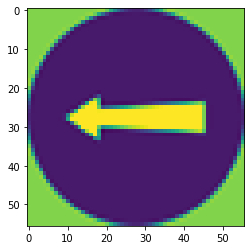

2


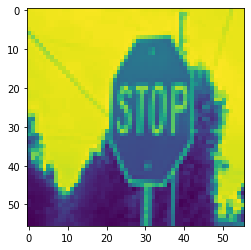

0


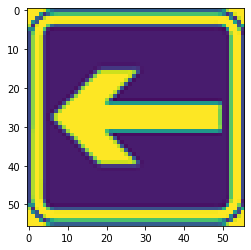

1


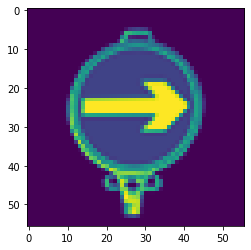

2


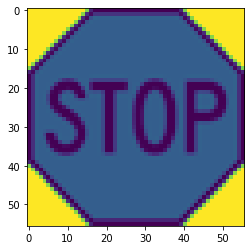

0


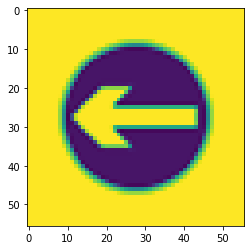

2


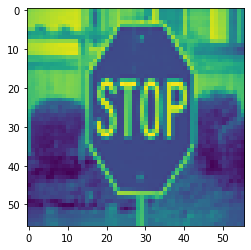

0


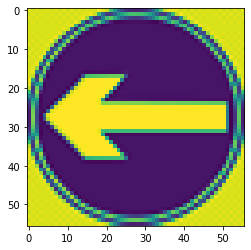

0


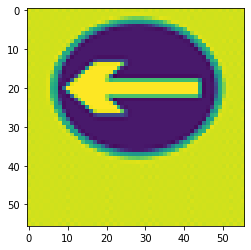

0


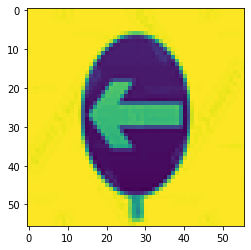

1


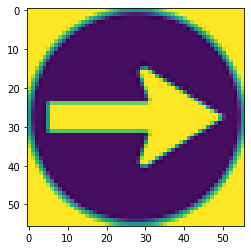

2


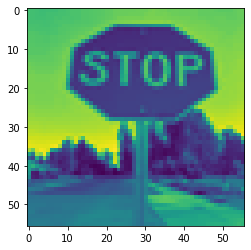

1


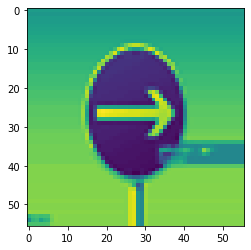

In [42]:
#Just Checking if data is intact or not
for img_array,label in training_set :
    print(label)
    plt.imshow(img_array)
    plt.show()

In [2]:
byte_set_dir = 'D:\Road_Sign_Data_Set\Processed_Images'

In [3]:
byte_file_path = open(byte_set_dir+'\\bytefile','ab')
pickle.dump(training_set,byte_file_path)
byte_file_path.close()

NameError: name 'training_set' is not defined

In [4]:
dbfile = open(byte_set_dir+'\\bytefile', 'rb')
data = pickle.load(dbfile)
dbfile.close()

Model testing with logistic regression

In [5]:
from sklearn.linear_model import LogisticRegression 

In [6]:
dbfile = open(byte_set_dir+'\\bytefile', 'rb')
data = pickle.load(dbfile)
dbfile.close()

In [7]:
def create_X_y (data):
    #takes a list containg training data 
    #returns X and y matrix
    X = []
    y = []
    for training_sample,lable in data :
        X.append(training_sample)
        y.append(lable)
    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y
X,y = create_X_y(data)

In [21]:
'''for img_array,label in zip(X,y) :
    print(label)
    plt.imshow(img_array)
    plt.show()'''

'for img_array,label in zip(X,y) :\n    print(label)\n    plt.imshow(img_array)\n    plt.show()'

In [10]:
def one_hot_encoder_for_labels (lable_array):
    #takes the raw label array 
    #return the one hot encoded
    #representation array
    unique_lables = np.unique(lable_array)
    unique_lables_count = len(unique_lables)
    sample_size = len(lable_array)
    y = []
    
    for lable in lable_array :
        temp_vector = np.zeros((unique_lables_count,1))
        index = np.where(unique_lables == lable )
        temp_vector[index] = 1
        y.append(temp_vector)
    y = np.asarray(y)
    y = y.T.reshape(unique_lables_count,sample_size)
    return y

In [10]:
X,y = create_X_y(data)
X = X.reshape(52,img_size*img_size)
X = X/255
y = one_hot_encoder_for_labels(y)

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter =1000).fit(X,y)

In [13]:
test_path = 'D:\Road_Sign_Data_Set\Test Data'+'\\'

In [16]:
files_list = os.listdir(test_path)
for file in files_list :
    image = Image.open(test_path+file).convert('L')
    image = image.resize((img_size,img_size))
    array_image = np.array(image)
    plt.imshow(array_image)
    plt.show()
    array_image = array_image.reshape(1,img_size*img_size)
    array_image = array_image/255
    pred_value = clf.predict(array_image)
    if pred_value == 0 :
        print('TAKE LEFT')
    if pred_value == 1 :
        print('TAKE RIGHT')
    if pred_value == 2 :
        print('STOP !!')
    print('******************************')    

"files_list = os.listdir(test_path)\nfor file in files_list :\n    image = Image.open(test_path+file).convert('L')\n    image = image.resize((img_size,img_size))\n    array_image = np.array(image)\n    plt.imshow(array_image)\n    plt.show()\n    array_image = array_image.reshape(1,img_size*img_size)\n    array_image = array_image/255\n    pred_value = clf.predict(array_image)\n    if pred_value == 0 :\n        print('TAKE LEFT')\n    if pred_value == 1 :\n        print('TAKE RIGHT')\n    if pred_value == 2 :\n        print('STOP !!')\n    print('******************************')    \n    "

In [3]:
pip install tensorflow==2.1.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.1.0
ERROR: No matching distribution found for tensorflow==2.1.0
